In [54]:
import yfinance as yf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from datetime import date
import pandas as pd

In [3]:
sp500 = yf.download('^GSPC',period='1d')
nb = yf.download('^NSEBANK',period='1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [156]:
def compare_index():
    sp500 = yf.download('^GSPC',period='1d',interval='5m',progress=False)
    nb = yf.download('^NSEBANK',period='1d',interval='5m',progress=False)
    nb2 = pd.DataFrame()
    sp2 = pd.DataFrame()
    
    if nb.index[0] > sp500.index[0]:
#         print('nb.index[0] > sp500.index[0]')
        nb2 = yf.download('^NSEBANK',period='2d',interval='5m')
        if nb2.index[0] == sp500.index[0]:
            pass
    
    if nb.index[0] < sp500.index[0]:
#         print('nb.index[0] < sp500.index[0]')
        sp2 = yf.download('^GSPC',period='2d',interval='5m')
        if sp2.index[0] == nb.index[0]:
            pass
        
    scaler = MinMaxScaler()
    
    if not nb2.empty:
#         print(1)
        plt.plot(scaler.fit_transform(np.array(sp500['Close']).reshape(-1,1)),label='S&P500')
        plt.plot(scaler.fit_transform(np.array(nb2['Close'][str(nb.index[0]).split()[0]]).reshape(-1,1)),label='Nifty Bank')
        plt.legend()
    


    if not sp2.empty:
#         print(2)
        plt.plot(scaler.fit_transform(np.array(sp2['Close'][str(nb.index[0]).split()[0]]).reshape(-1,1)),label='S&P500  2')
        plt.plot(scaler.fit_transform(np.array(nb['Close']).reshape(-1,1)),label='Nifty Bank  2')
        plt.legend()
        
    if not nb2.empty:
        return sp500,nb2
    if not sp2.empty:
        return sp2,nb

[*********************100%***********************]  1 of 1 completed


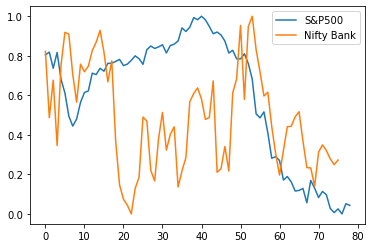

In [157]:
sp,nb = compare_index()

In [140]:
nb.index[0]

Timestamp('2023-08-04 09:15:00+0530', tz='Asia/Kolkata')

In [137]:
nb

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-04 09:15:00+05:30,44754.750000,44754.750000,44610.000000,44716.101562,44716.101562,0
2023-08-04 09:20:00+05:30,44715.898438,44720.101562,44648.000000,44707.500000,44707.500000,0
2023-08-04 09:25:00+05:30,44710.949219,44727.851562,44677.750000,44725.250000,44725.250000,0
2023-08-04 09:30:00+05:30,44724.601562,44729.050781,44648.000000,44698.800781,44698.800781,0
2023-08-04 09:35:00+05:30,44700.000000,44703.199219,44620.949219,44634.101562,44634.101562,0
...,...,...,...,...,...,...
2023-08-07 15:10:00+05:30,44842.699219,44858.449219,44835.101562,44852.351562,44852.351562,0
2023-08-07 15:15:00+05:30,44852.300781,44857.000000,44840.250000,44846.800781,44846.800781,0
2023-08-07 15:20:00+05:30,44846.398438,44857.449219,44833.601562,44838.601562,44838.601562,0


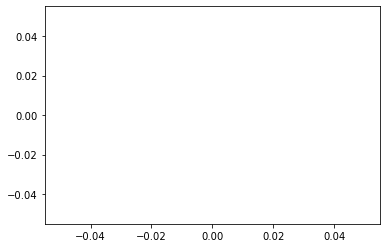

In [134]:
plt.plot(scaler.fit_transform(np.array(nb['Close'][0]).reshape(-1,1)),label='Nifty Bank')

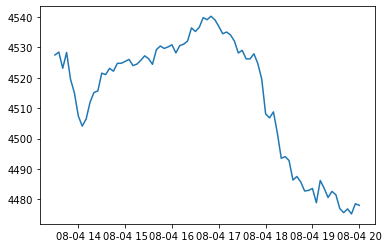

In [100]:
plt.plot(`sp['Close'])

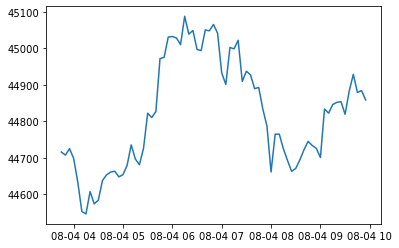

In [109]:
plt.plot(nb['Close']['2023-08-04'])

In [142]:
nb['Close']['2023-08-04 09:15:00+05:30']

44716.1015625

In [145]:
nb['Close'][str(nb.index[0]).split()[0]]

Datetime
2023-08-04 09:15:00+05:30    44716.101562
2023-08-04 09:20:00+05:30    44707.500000
2023-08-04 09:25:00+05:30    44725.250000
2023-08-04 09:30:00+05:30    44698.800781
2023-08-04 09:35:00+05:30    44634.101562
                                 ...     
2023-08-04 15:05:00+05:30    44882.699219
2023-08-04 15:10:00+05:30    44928.800781
2023-08-04 15:15:00+05:30    44879.250000
2023-08-04 15:20:00+05:30    44884.199219
2023-08-04 15:25:00+05:30    44858.500000
Name: Close, Length: 75, dtype: float64

In [141]:
for i in nb.index:
    print(i)

2023-08-04 09:15:00+05:30
2023-08-04 09:20:00+05:30
2023-08-04 09:25:00+05:30
2023-08-04 09:30:00+05:30
2023-08-04 09:35:00+05:30
2023-08-04 09:40:00+05:30
2023-08-04 09:45:00+05:30
2023-08-04 09:50:00+05:30
2023-08-04 09:55:00+05:30
2023-08-04 10:00:00+05:30
2023-08-04 10:05:00+05:30
2023-08-04 10:10:00+05:30
2023-08-04 10:15:00+05:30
2023-08-04 10:20:00+05:30
2023-08-04 10:25:00+05:30
2023-08-04 10:30:00+05:30
2023-08-04 10:35:00+05:30
2023-08-04 10:40:00+05:30
2023-08-04 10:45:00+05:30
2023-08-04 10:50:00+05:30
2023-08-04 10:55:00+05:30
2023-08-04 11:00:00+05:30
2023-08-04 11:05:00+05:30
2023-08-04 11:10:00+05:30
2023-08-04 11:15:00+05:30
2023-08-04 11:20:00+05:30
2023-08-04 11:25:00+05:30
2023-08-04 11:30:00+05:30
2023-08-04 11:35:00+05:30
2023-08-04 11:40:00+05:30
2023-08-04 11:45:00+05:30
2023-08-04 11:50:00+05:30
2023-08-04 11:55:00+05:30
2023-08-04 12:00:00+05:30
2023-08-04 12:05:00+05:30
2023-08-04 12:10:00+05:30
2023-08-04 12:15:00+05:30
2023-08-04 12:20:00+05:30
2023-08-04 1

In [167]:
sgx = yf.download('NIFTYSGX.ns',period='1d')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NIFTYSGX.NS: No data found, symbol may be delisted


In [161]:
sgx

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-07,3296.889893,3312.870117,3293.699951,3309.870117,3309.870117,0
